# PROJET 6 :  DÉTECTER DES FAUX BILLETS


### CONTEXTE
- Lutte contre la criminalité organisée, à l'Office central pour la répression du faux monnayage. 
- Mission : créer un algorithme de détection de faux billets.

### OBJECTIFS : 
- Effectuer une analyse de statistique descriptive
- Effectuer une analyse en composantes principales
- Effectuer une classification automatique, et une modélisation de type régression logistique.

## Import des librairies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('mode.use_inf_as_na', True)

In [2]:
import os
os.getcwd()
os.chdir('/Users/mouniamfoungoulie/Documents/Openclassrooms-Dataanalyst/Projet 6')
os.getcwd()

'/Users/mouniamfoungoulie/Documents/Openclassrooms-Dataanalyst/Projet 6'

## Données

In [3]:
#Import fichier 
notes = pd.read_csv("./Data/notes.csv")
notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [4]:
print(notes.shape)
notes.head()

(170, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [5]:
notes.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [6]:
notes["is_genuine"].value_counts()

True     100
False     70
Name: is_genuine, dtype: int64

In [7]:
notes.groupby(by='is_genuine').mean()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
True,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200


In [8]:
# test Student pour voir si les moyennes sont significatives ou pas 


In [9]:
true=notes.loc[notes['is_genuine'].isin([True]),:]
print(true.shape)
true.head()

(100, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [10]:
true.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200
std,0.307981,0.296251,0.292406,0.314509,0.197726,0.380476
min,171.040000,103.230000,103.140000,3.540000,2.270000,111.760000
25%,171.790000,103.740000,103.557500,3.900000,2.937500,112.995000
50%,172.005000,103.915000,103.760000,4.080000,3.070000,113.210000
75%,172.162500,104.145000,103.972500,4.382500,3.192500,113.505000
max,172.750000,104.860000,104.950000,5.040000,3.530000,113.980000


In [11]:
false=notes[notes['is_genuine'].isin([False])]
print(false.shape)
false.head()

(70, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
100,False,171.45,104.03,104.26,4.88,3.44,111.92
101,False,171.97,104.38,104.18,5.59,3.47,110.98
102,False,171.94,104.21,104.10,4.28,3.47,112.23
103,False,172.04,104.34,104.48,4.88,3.28,112.15
104,False,171.75,104.16,104.23,5.75,3.25,111.68


In [12]:
false.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
std,0.297426,0.213130,0.253152,0.540846,0.185102,0.676931
min,171.380000,103.780000,103.440000,3.820000,2.980000,109.970000
25%,171.682500,104.082500,103.982500,4.952500,3.185000,111.270000
50%,171.875000,104.215000,104.170000,5.265000,3.335000,111.765000
75%,172.047500,104.377500,104.280000,5.702500,3.450000,111.985000
max,173.010000,104.720000,104.860000,6.280000,3.680000,113.640000


# I - Mission 0 : DESCRIPTION DES DONNEES

### Analyse univariée

In [13]:
print(notes.shape)
notes.head()

(170, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


Text(0, 0.5, 'Total ')

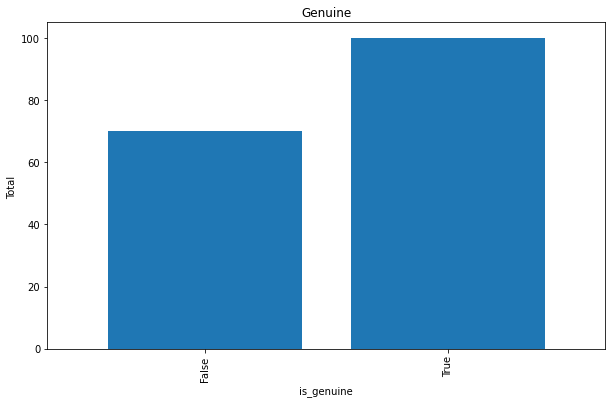

In [14]:
test = notes.groupby('is_genuine').size()
plt.figure(figsize=(10,6))
test.plot(kind='bar', title='Genuine', width=0.8)
plt.ylabel('Total ')

### Analyse bivariée

Text(0, 0.5, 'Longeur diagonale en (mm)')

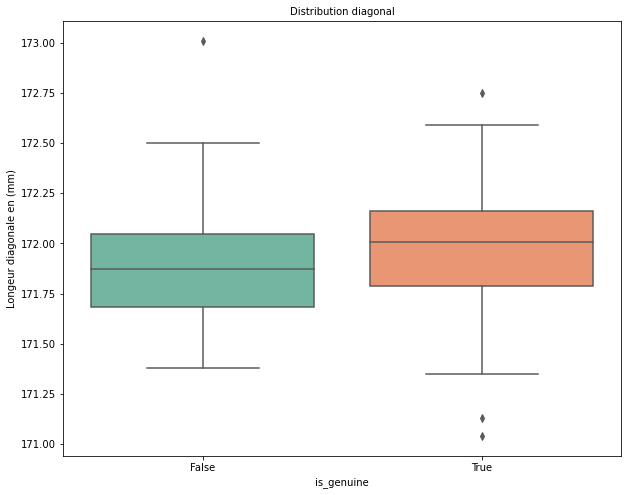

In [15]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="is_genuine", y="diagonal", data=notes,  palette="Set2").set_title('Distribution diagonal', size=10)
plt.xlabel("is_genuine", size=10)
plt.ylabel("Longeur diagonale en (mm)", size=10)

Analyse : La diagonale est qasi identique entre les fsux et vrais billets

In [16]:
#Test ANOVA
#diagonal = quantitative
#is_genuine = qualitative
import statsmodels.formula.api; fit = statsmodels.formula.api.ols('diagonal ~ is_genuine', data = notes).fit()
import statsmodels.api; table = statsmodels.api.stats.anova_lm(fit)
table

,df,sum_sq,mean_sq,F,PR(>F)
is_genuine,1.0,0.306264,0.306264,3.320728,0.07019
Residual,168.0,15.494278,0.092228,NaN,NaN


Text(0, 0.5, 'length')

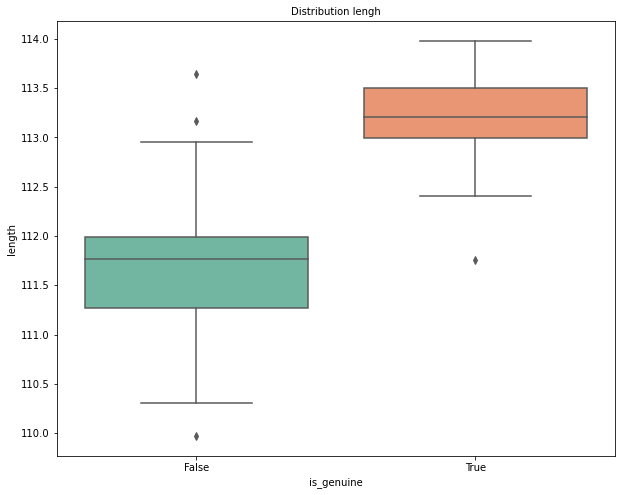

In [17]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="is_genuine", y="length", data=notes,  palette="Set2").set_title('Distribution lengh', size=10)
plt.xlabel("is_genuine", size=10)
plt.ylabel("length", size=10)

Analyse : 

Text(0, 0.5, 'height_left')

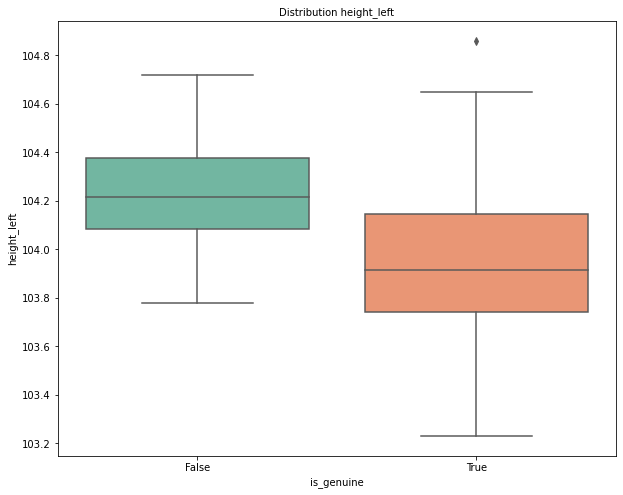

In [18]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="is_genuine", y="height_left", data=notes,  palette="Set2").set_title('Distribution height_left', size=10)
plt.xlabel("is_genuine", size=10)
plt.ylabel("height_left", size=10)



Text(0, 0.5, 'margin_low')

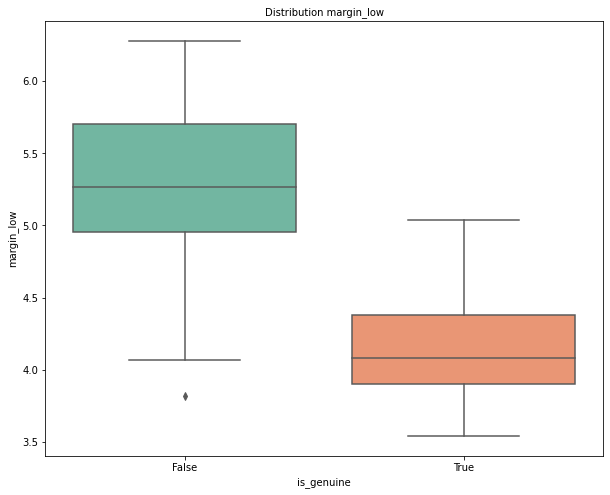

In [19]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="is_genuine", y="margin_low", data=notes,  palette="Set2").set_title('Distribution margin_low', size=10)
plt.xlabel("is_genuine", size=10)
plt.ylabel("margin_low", size=10)

       margin_low
count  170.000000
mean     4.612118
std      0.702103
min      3.540000
25%      4.050000
50%      4.450000
75%      5.127500
max      6.280000


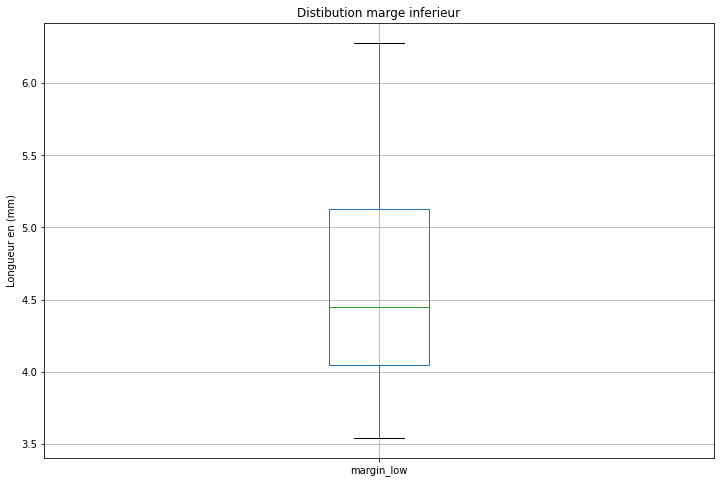

In [20]:
print(notes[['margin_low']].describe())

plt.figure(figsize=(12,8))
test = notes.boxplot(column=['margin_low'])
plt.title("Distibution marge inferieur")
plt.ylabel("Longueur en (mm)")
plt.suptitle("")
plt.show()

count    170.000000
mean       4.612118
std        0.702103
min        3.540000
25%        4.050000
50%        4.450000
75%        5.127500
max        6.280000
Name: margin_low, dtype: float64


array([[<AxesSubplot:title={'center':'margin_low'}>]], dtype=object)

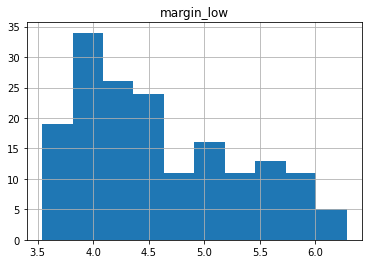

In [21]:
#Distribution hauteur
print(notes.margin_low.describe())
notes[['margin_low']].hist(bins = 10)

## ANALYSE STATISTIQUE

### 1- Analyse des correlations entre variables

In [22]:
#Remplacer valeurs nulles par 0
data_pca = notes.fillna(0)
print(data_pca.shape)

(170, 7)


<AxesSubplot:>

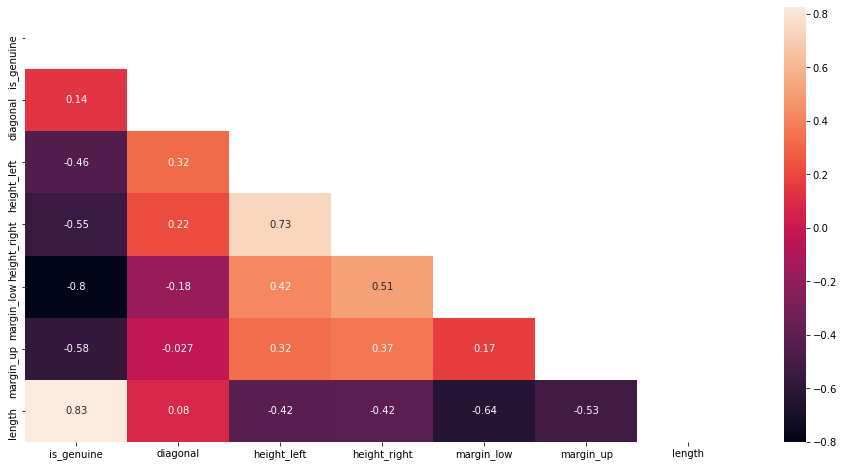

In [23]:
#Matrice de correlation de Pearson
corrMatrix = data_pca.corr(method = 'pearson')
matrix = np.triu(corrMatrix)
plt.figure(figsize = (16,8))
sns.heatmap(corrMatrix, annot=True, mask=matrix)

In [24]:
# Analyse : 

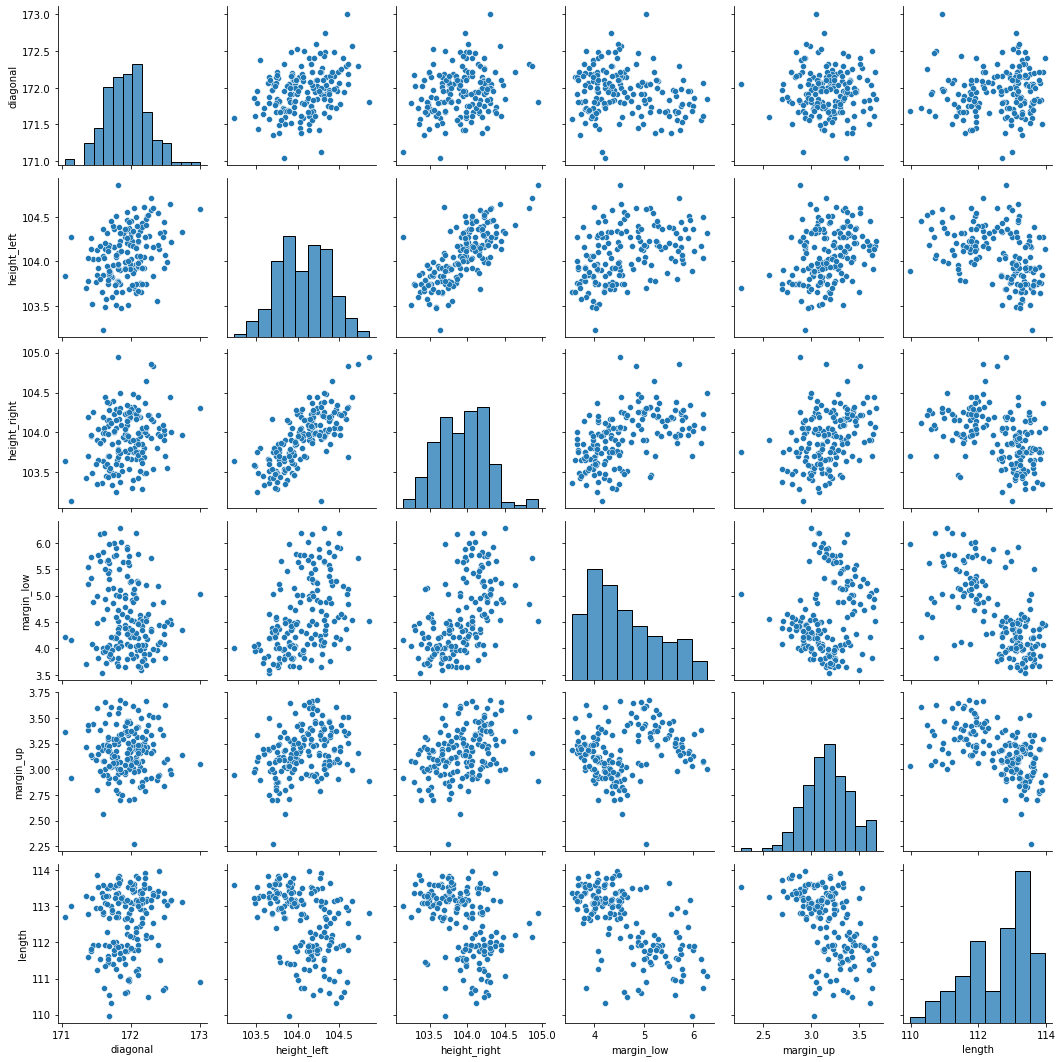

In [25]:
# Pairwise correlation : Etude des dépendence entre plusieurs variables en même temps

import seaborn as sns
sns.pairplot(data_pca[['diagonal','height_left','height_right','margin_low', 'margin_up', 'length']], diag_kind='hist')

- Analyse : Pas de correlation visible

### 2- Analyse statistique inferentielle

#### a- Test de normalité

In [26]:
# Shapiro-Wilk Test 
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

def shapiro_wilk_test_stats(column):
    # seed the random number generator
    seed(1)

    # normality test
    stat, p = shapiro(column)

    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # interpret
    alpha = 0.05
    if p > alpha:
        print("L'echantillon semble Gaussien (validation H0)")
    else:
        print("'L'echantillon n'est pas Gaussien (Reject H0)")
    

In [27]:
for column in data_pca:
    print(data_pca[[column]].head())

   is_genuine
0        True
1        True
2        True
3        True
4        True
   diagonal
0    171.81
1    171.67
2    171.83
3    171.80
4    172.05
   height_left
0       104.86
1       103.74
2       103.76
3       103.78
4       103.70
   height_right
0        104.95
1        103.70
2        103.76
3        103.65
4        103.75
   margin_low
0        4.52
1        4.01
2        4.40
3        3.73
4        5.04
   margin_up
0       2.89
1       2.87
2       2.88
3       3.12
4       2.27
   length
0  112.83
1  113.29
2  113.84
3  113.63
4  113.55


In [28]:
shapiro_wilk_test_stats(data_pca['height_left'])
shapiro_wilk_test_stats(data_pca['diagonal'])
shapiro_wilk_test_stats(data_pca['height_right'])

Statistics=0.993, p=0.553
L'echantillon semble Gaussien (validation H0)
Statistics=0.993, p=0.611
L'echantillon semble Gaussien (validation H0)
Statistics=0.988, p=0.163
L'echantillon semble Gaussien (validation H0)


In [29]:
# Shapiro-Wilk Test 
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro


# seed the random number generator
seed(1)

# normality test
stat, p = shapiro(data_pca['height_left'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.993, p=0.553
L'echantillon semble Gaussien (validation H0)


In [30]:
# Shapiro-Wilk Test 
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# seed the random number generator
seed(1)

# normality test
stat, p = shapiro(data_pca['diagonal'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.993, p=0.611
L'echantillon semble Gaussien (validation H0)


In [31]:
# Shapiro-Wilk Test 
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# seed the random number generator
seed(1)

# normality test
stat, p = shapiro(data_pca['height_right'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.988, p=0.163
L'echantillon semble Gaussien (validation H0)


In [32]:
# Shapiro-Wilk Test 
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# seed the random number generator
seed(1)

# normality test
stat, p = shapiro(data_pca['margin_low'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.935, p=0.000
'L'echantillon n'est pas Gaussien (Reject H0)


In [33]:
# Shapiro-Wilk Test 
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# seed the random number generator
seed(1)

# normality test
stat, p = shapiro(data_pca['margin_up'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.989, p=0.204
L'echantillon semble Gaussien (validation H0)


In [34]:
# Shapiro-Wilk Test 
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# seed the random number generator
seed(1)

# normality test
stat, p = shapiro(data_pca['length'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.932, p=0.000
'L'echantillon n'est pas Gaussien (Reject H0)


#### b- qq plot


- diagramme Q-Q (quantile-quantile) est un diagramme permettant de comparer deux distributions de probabilité en traçant leurs quantiles l'un par rapport à l'autre. 
- Si les deux distributions comparées sont similaires, les points du graphique Q-Q se situeront approximativement sur la ligne y = x.

/opt/anaconda3/envs/projet_6/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/envs/projet_6/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/envs/projet_6/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/envs/projet_6/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly 

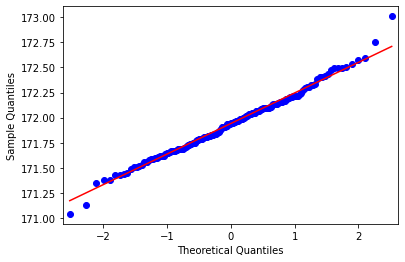

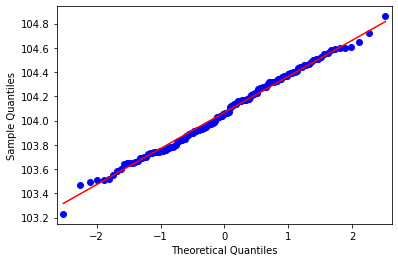

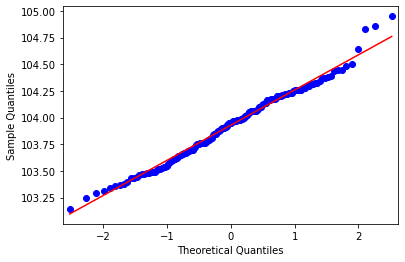

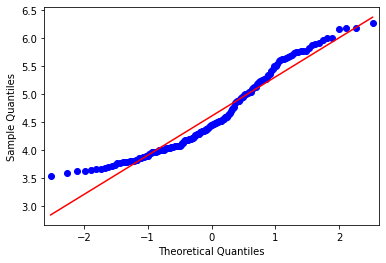

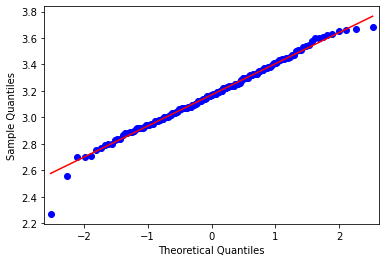

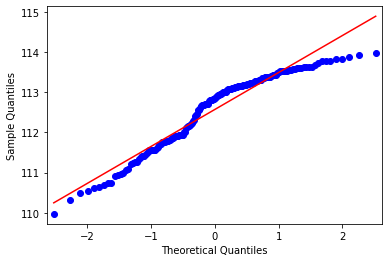

In [35]:
import statsmodels.api as sm

'diagonal','height_left','height_right','margin_low', 'margin_up', 'length'
fig = sm.qqplot(data_pca['diagonal'], line ='s')
fig = sm.qqplot(data_pca['height_left'], line='s')
fig = sm.qqplot(data_pca['height_right'], line='s')
fig = sm.qqplot(data_pca['margin_low'], line='s')
fig = sm.qqplot(data_pca['margin_up'], line='s')
fig = sm.qqplot(data_pca['length'], line='s')
plt.show()

## Analyse

Les tests supposent que l'échantillon a été tiré d'une distribution gaussienne. Techniquement, cela s'appelle l'hypothèse nulle, ou H0. On choisit un niveau seuil appelé alpha, généralement 5 % (ou 0,05), qui est utilisé pour interpréter la valeur p.

- p <= alpha : rejeter H0, non normal.
- p > alpha : ne rejette pas H0, normal.

Cela signifie qu'en général, nous cherchons des résultats avec une valeur p plus grande pour confirmer que notre échantillon a probablement été tiré d'une distribution gaussienne.

Dans notre cas les resultats des tests montrent que dans la data_pca seuls les variables:  length et margin_low ne suivent pas probablement une loi normale.

# II - Mission I : analyse en composantes principales ACP

- https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis

In [36]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [37]:
# choix du nombre de composantes à calculer
n_comp = 5

# import de l'échantillon
data_pca = notes[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_pca.index # ou data.index pour avoir les intitulés
features = data_pca.columns

In [38]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)#ici

normalised_x = pd.DataFrame(X_scaled,columns=features)
normalised_x.tail()

,diagonal,height_left,height_right,margin_low,margin_up,length
165,0.555689,0.550431,1.581436,0.896930,1.738009,-0.857535
166,3.507789,1.761301,1.157201,0.611230,-0.510944,-1.801418
167,1.736529,0.684972,0.520847,0.382670,0.677182,-2.050950
168,-0.395543,-0.324086,-0.145809,0.168395,1.610710,-0.759892
169,0.063673,-0.223180,0.066309,1.454046,0.380151,-1.747172


In [39]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=5)

In [40]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# Les 3 premieres composantes expliquent 82% de la variance de notre echantillon

Explained variation per principal component: [0.47447921 0.21957106 0.14234524 0.08526295 0.04612822]


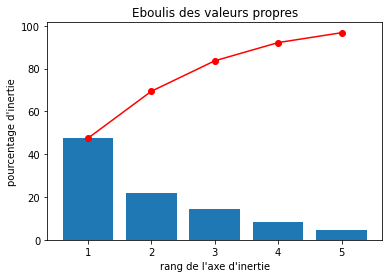

In [41]:
# Eboulis des valeurs propres
display_scree_plot(pca)

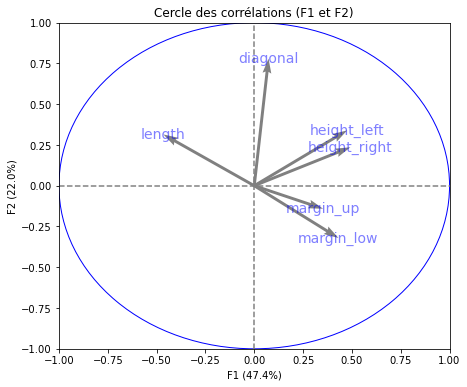

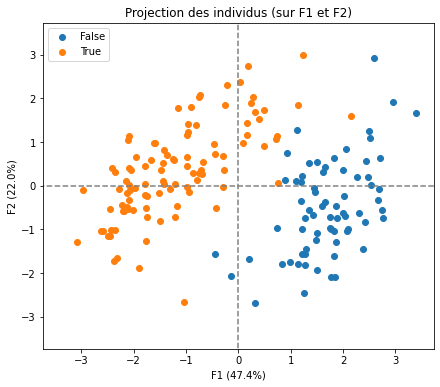

In [42]:

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)#ici
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=notes['is_genuine'])
#display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=pure['is_genuine'])

plt.show()

#### Analyse 
- PC1: est influencé positivement par hight left, hight right et diagonal
- PC2 : est influencé par length

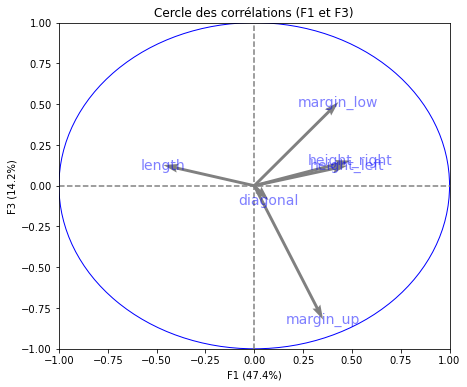

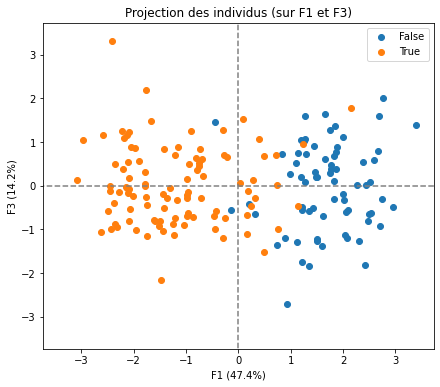

In [43]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,2)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)#ici
display_factorial_planes(X_projected, n_comp, pca, [(0,2)], illustrative_var=notes['is_genuine'])
#display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=pure['is_genuine'])

plt.show()

#### Analyse 
- PC1: est influencé positivement par Margin low, hight left, hight right 
- PC3 : est influencé  par length

In [44]:
#http://eric.univ-lyon2.fr/~ricco/cours/slides/regression_logistique.pdf
#http://eric.univ-lyon2.fr/~ricco/cours/slides/classif_centres_mobiles.pdf

# III - MISSION 2 : Appliquez un algorithme de classification, puis analysez le résultat obtenu.

- Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la

## KMEANS

Kmeans est un algorithme de classification non supervisée. A partir d’un ensemble de points, il détermine pour un nombre de classes fixé, une répartition des points qui minimise un critère appelé inertie ou variance intra-classe.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

L’objectif du kmeans est de minimiser l’inertie intra-classes W, à nombre de classes K fixé.

Principe : Une stratégie simple pour identifier le nombre de classes consiste à faire varier K et surveiller l’évolution de l’inertie intra-classes SSE. L’idée est de visualiser le « coude » où l’adjonction d’une classe ne correspond à rien dans la structuration des données.

inertie intra-classes SSE est la somme des distances entre chaque centroid d’un cluster et les différentes observations inclues dans le même cluster. 

## Choisir le nombre de cluster approprie

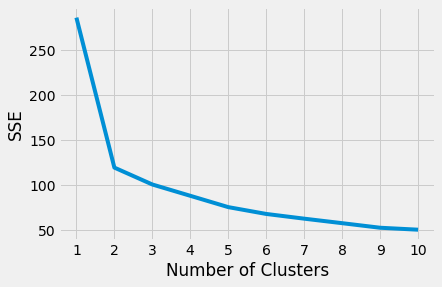

In [46]:
kmeans_kwargs = {
"init": "random",
    "n_init": 10,
   "max_iter": 300,
   "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    # Boucle pour executer kmeans avec 1 clusters, puis 2,3 etc jusqu'a 11
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    
    # Enregistre inertie pour chaque execution ce qui nous permet de choisir le nombre optimal de clusters
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

La partition en K = 2 classes est la dernière à induire un gain informationnel significatif.

## Cas theroique Analyse SSE avec k=170 

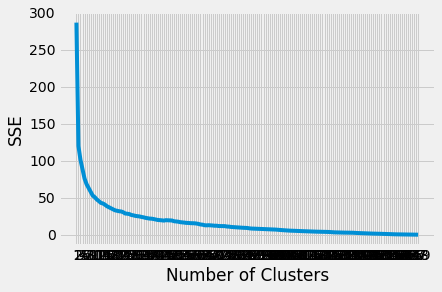

In [47]:
kmeans_kwargs = {
"init": "random",
    "n_init": 10,
   "max_iter": 300,
   "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 170):
    # Boucle pour executer kmeans avec 1 clusters, puis 2,3 etc jusqu'a 11
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    
    # Enregistre inertie pour chaque execution ce qui nous permet de choisir le nombre optimal de clusters
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 170), sse)
plt.xticks(range(1, 170))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Kmeans avec 2 clusters

In [48]:
# Nombre de clusters souhaités
n_clust = 2

# import de l'échantillon
data = notes[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

# préparation des données pour le clustering
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

In [49]:
# The lowest SSE value
km.inertia_

119.81479360022965

In [50]:
# The number of iterations required to converge
km.n_iter_

5

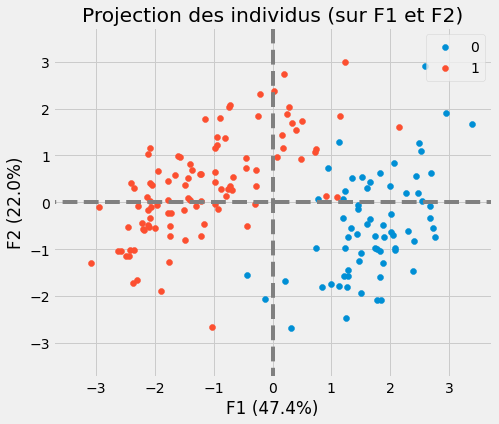

In [51]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],  illustrative_var= np.array(clusters))
plt.show()

Confusion Matrix (matrice de confusion) ou tableau de contingence est un outil permettant de mesurer les performances d’un modèle de Machine Learning en vérifiant notamment à quelle fréquence ses prédictions sont exactes par rapport à la réalité dans des problèmes de classification.

In [52]:
print("Matrice de confusion")
ok = pd.crosstab(clusters, notes.is_genuine)
ok.index = ['Cluster 1','Cluster 2']
ok.columns = ['Faux','Vrais']
ok

Matrice de confusion


,Faux,Vrais
Cluster 1,68,1
Cluster 2,2,99


Vrai Faux billet (TP): le billet est Faux, ainsi que prévue pour être un faux billet
Faux vrai billet (FN): le billet est faux; cependant, il est prévu vrai billet.
Vrai vrai billet (TN): le billet est vrai billet, ainsi que prévue pour être vrai billet.
Faux faux billet (FP): le billet est faux, cependant, est attendue vrai.

https://ichi.pro/fr/comprendre-la-matrice-de-confusion-dans-l-apprentissage-automatique-d-une-maniere-moins-deroutante-25212988411234

In [53]:
# Accuracy
# Specificity
# false postivie rate
# True positive rate

TP (True Positives) : les cas où la prédiction est positive, et où la valeur réelle est effectivement positive. Exemple : le médecin vous annonce que vous êtes enceinte, et vous êtes bel et bien enceinte.

TN (True Negatives) : les cas où la prédiction est négative, et où la valeur réelle est effectivement négative. Exemple : le médecin vous annonce que vous n’êtes pas enceinte, et vous n’êtes effectivement pas enceinte.

FP (False Positive) : les cas où la prédiction est positive, mais où la valeur réelle est négative. Exemple : le médecin vous annonce que vous êtes enceinte, mais vous n’êtes pas enceinte.

FN (False Negative) : les cas où la prédiction est négative, mais où la valeur réelle est positive. Exemple : le médecin vous annonce que vous n’êtes pas enceinte, mais vous êtes enceinte.


## IV - MISSION 3 : Modélisez les données à l'aide d'une régression logistique. 
- créerez un programme capable d'effectuer une prédiction sur un billet : déterminer s'il s'agit d'un vrai ou d'un faux billet. 
- Pour chaque billet, votre algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux

In [54]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [55]:
notes.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [56]:
print(notes.columns)

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')


## Regression Logistique sur la totalité du jeu de donnée afin d'effectuer une analyse statistique

- sklearn method

In [65]:
from sklearn.linear_model import LogisticRegression
X = notes.drop(['is_genuine'], axis=1).values
y = notes['is_genuine']

logistic = LogisticRegression()
logistic.fit(X,y)

LogisticRegression()

In [66]:
probabilites = logistic.predict_proba(X)
probabilites[0:10]

array([[0.36289278, 0.63710722],
       [0.00623324, 0.99376676],
       [0.00640269, 0.99359731],
       [0.00197   , 0.99803   ],
       [0.03026446, 0.96973554],
       [0.18793226, 0.81206774],
       [0.00735951, 0.99264049],
       [0.00142519, 0.99857481],
       [0.00862386, 0.99137614],
       [0.44702873, 0.55297127]])

- method with stats

In [67]:
from sklearn.linear_model import LogisticRegression
X = notes_logistic_regression.drop(['is_genuine'], axis=1).values
y = notes_logistic_regression['is_genuine']

model = sm.Logit(y, X)

NameError: name 'notes_logistic_regression' is not defined

In [61]:
result = model.fit()


         Current function value: inf
         Iterations: 35


/opt/anaconda3/envs/projet_6/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/projet_6/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [ ]:
result.params

In [ ]:
probabilites[0:9]